In [ ]:
!pip install pyod
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=8701dca4e182e3bc4aaf0ed648462a57d3dd2c8e8c7a0c46c5aa80310f3b7c66
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
import pyod
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
from pyod.utils.data import generate_data_clusters
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.datasets import make_blobs

In [ ]:
# Exercise 1

def linear_model(a, b, µ, σ, num_samples):
  xs = [i for i in range(num_samples)]
  ys = [a * x + b + random.gauss(µ, σ) for x in xs]

  return xs, ys

def linear_model_high_x_var(a, b, µ, σ, num_samples):
  xs = [i for i in range(num_samples)]
  ys = [a * x + b + random.gauss(µ, σ) for x in xs]

  xs = [i + random.gauss(0, 10) for i in range(num_samples)]

  return xs, ys

def linear_model_high_y_var(a, b, µ, σ, num_samples):
  xs = [i for i in range(num_samples)]
  ys = [a * x + b + random.gauss(µ, σ) for x in xs]

  for y in ys:
    y += random.gauss(0, 10)

  return xs, ys

def linear_model_high_x_var_high_y_var(a, b, µ, σ, num_samples):
  xs = [i + random.gauss(0, 10) for i in range(num_samples)]
  ys = [a * x + b + random.gauss(µ, σ) for x in xs]

  for y in ys:
    y += random.gauss(0, 10)

  return xs, ys

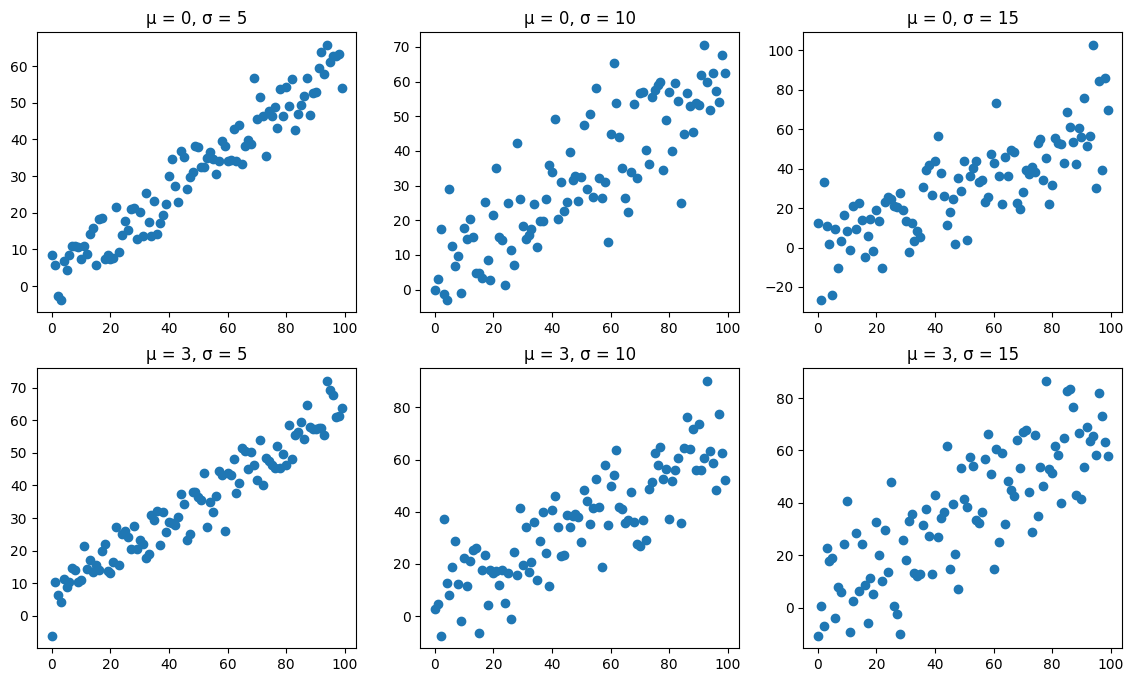

In [ ]:
a = 0.6
b = 3
µ = 0.5
σ = 7

figure, axis = plt.subplots(2, 3)

figure.set_figwidth(14)
figure.set_figheight(8)

for i, µ in enumerate([0, 3]):
  for j, σ in enumerate([5, 10, 15]):
    regular_points_x, regular_points_y = linear_model(a, b, µ, σ, 100)

    axis[i, j].scatter(regular_points_x, regular_points_y)
    axis[i, j].set_title(f"µ = {µ}, σ = {σ}")

plt.show()


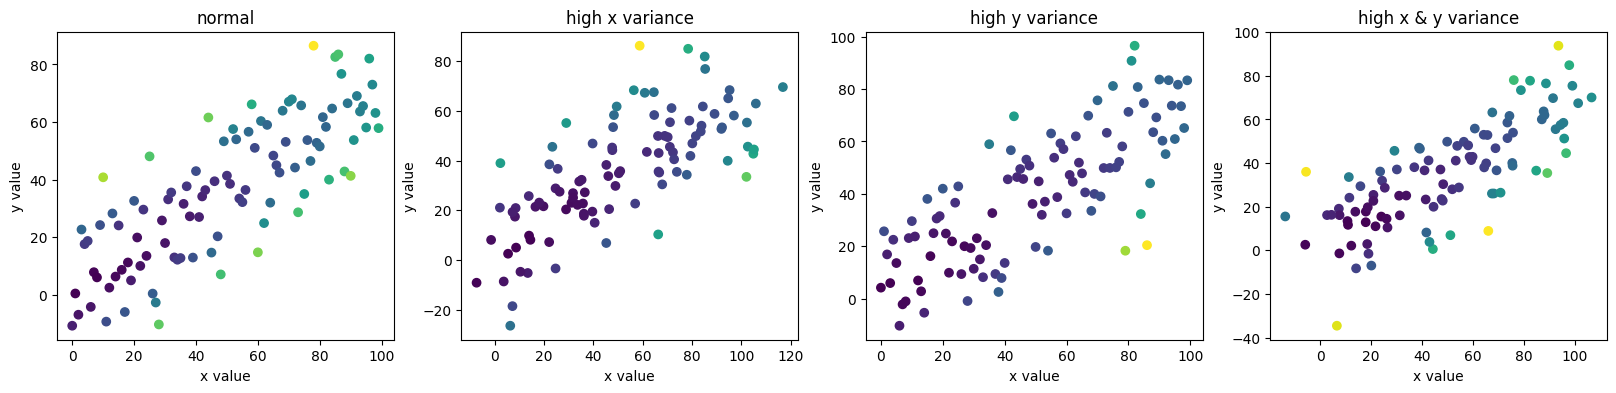

In [ ]:
high_x_var_x, high_x_var_y = linear_model_high_x_var(a, b, µ, σ, 100)
high_y_var_x, high_y_var_y = linear_model_high_y_var(a, b, µ, σ, 100)
high_xy_var_x, high_xy_var_y = linear_model_high_x_var_high_y_var(a, b, µ, σ, 100)

figure, axis = plt.subplots(1, 4, figsize=(20, 4))

for i, (x_coords, y_coords) in enumerate([(regular_points_x, regular_points_y), (high_x_var_x, high_x_var_y), (high_y_var_x, high_y_var_y), (high_xy_var_x, high_xy_var_y)]):
  X = [(x_coords[i], y_coords[i]) for i in range(len(x_coords))]

  U, S, Vh = np.linalg.svd(X, full_matrices=False)
  H = np.dot(U, U.T)

  leverage = np.diagonal(H)

  axis[i].scatter(x_coords, y_coords, c=leverage, cmap='viridis')
  # plt.colorbar(ax=axis[i], label='leverage score')
  axis[i].set_xlabel('x value')
  axis[i].set_ylabel('y value')

  if i == 0:
    axis[i].set_title('normal')

  if i == 1:
    axis[i].set_title('high x variance')

  if i == 2:
    axis[i].set_title('high y variance')

  if i == 3:
    axis[i].set_title('high x & y variance')

plt.show()

In [ ]:
# Exercise 2

X_train, X_test, y_train, y_test = generate_data_clusters(n_train=400, n_test=200)

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


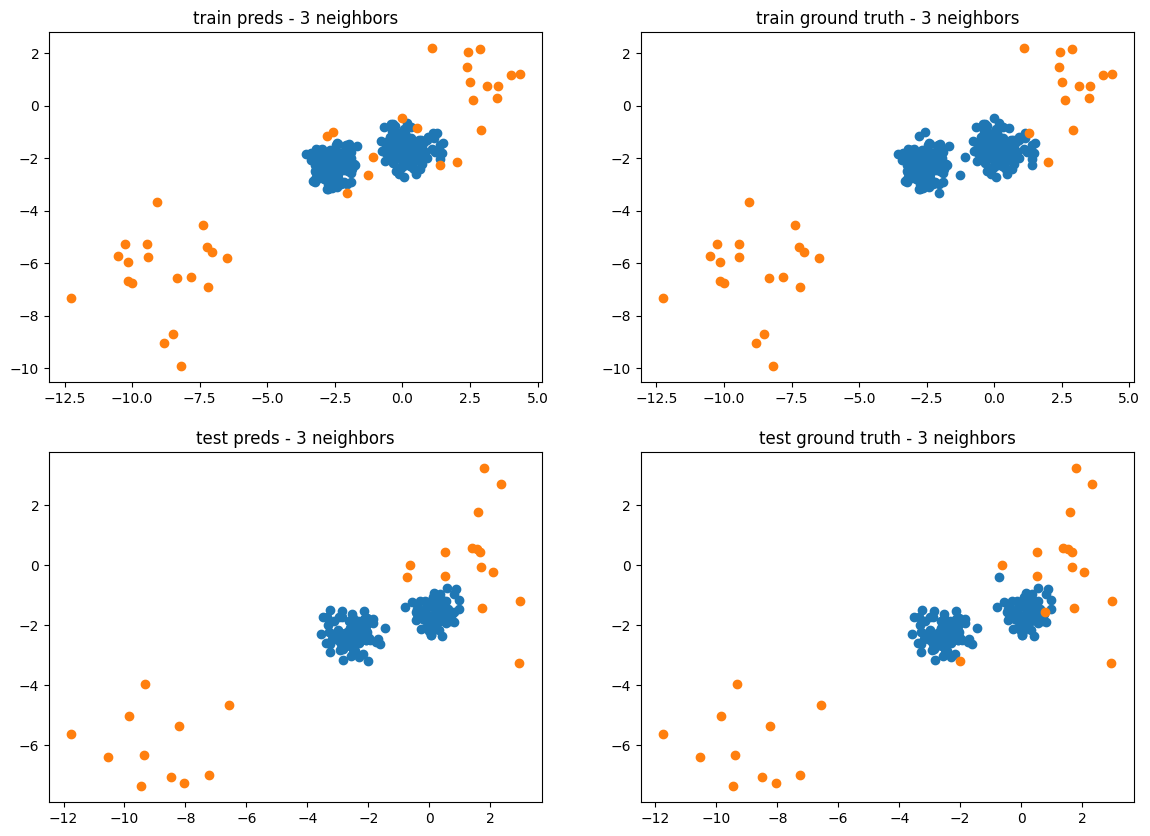

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


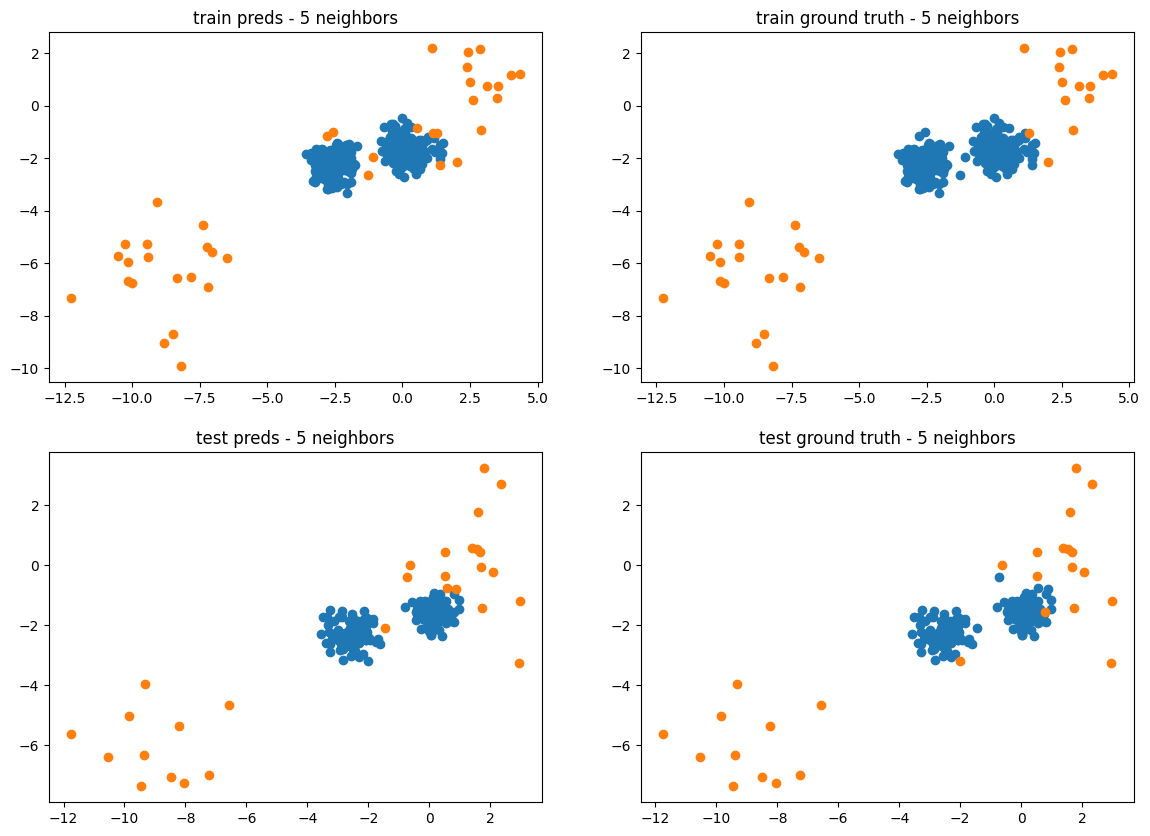

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


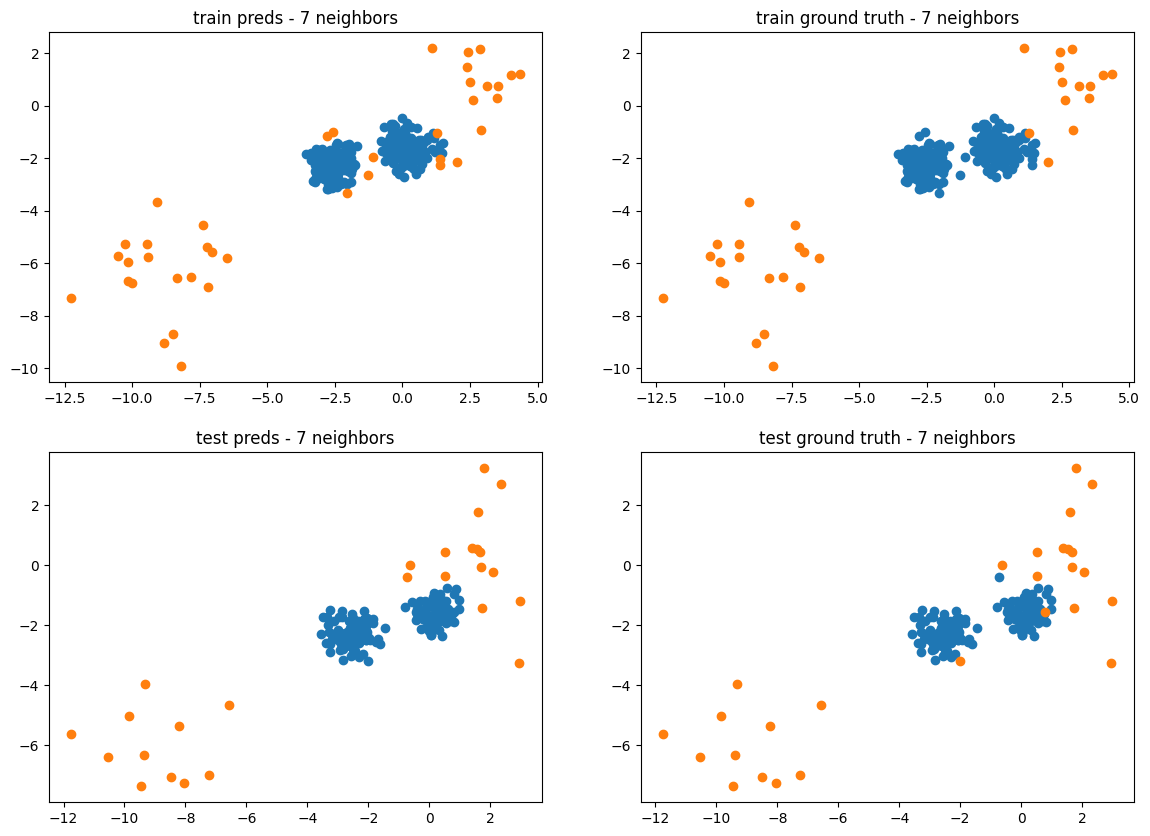

In [ ]:
for n_neigh in [3, 5, 7]:
  clf = KNN(n_neighbors=n_neigh)
  clf.fit(X_train, y_train)

  y_train_pred = clf.labels_
  y_test_pred = clf.predict(X_test)

  figure, axis = plt.subplots(2, 2, figsize=(14, 10))

  outlier_mask_train = y_train == 1
  outlier_mask_test = y_test == 1
  pred_mask_train = y_train_pred == 1
  pred_mask_test = y_test_pred == 1

  axis[0][0].scatter(X_train[~pred_mask_train,:1], X_train[~pred_mask_train,1:])
  axis[0][0].scatter(X_train[pred_mask_train,:1], X_train[pred_mask_train,1:])
  axis[0][0].set_title('train preds - ' + str(n_neigh) + ' neighbors')

  axis[0][1].scatter(X_train[~outlier_mask_train,:1], X_train[~outlier_mask_train,1:])
  axis[0][1].scatter(X_train[outlier_mask_train,:1], X_train[outlier_mask_train,1:])
  axis[0][1].set_title('train ground truth - ' + str(n_neigh) + ' neighbors')

  axis[1][0].scatter(X_test[~pred_mask_test,:1], X_test[~pred_mask_test,1:])
  axis[1][0].scatter(X_test[pred_mask_test,:1], X_test[pred_mask_test,1:])
  axis[1][0].set_title('test preds - ' + str(n_neigh) + ' neighbors')

  axis[1][1].scatter(X_test[~outlier_mask_test,:1], X_test[~outlier_mask_test,1:])
  axis[1][1].scatter(X_test[outlier_mask_test,:1], X_test[outlier_mask_test,1:])
  axis[1][1].set_title('test ground truth - ' + str(n_neigh) + ' neighbors')

  plt.show()

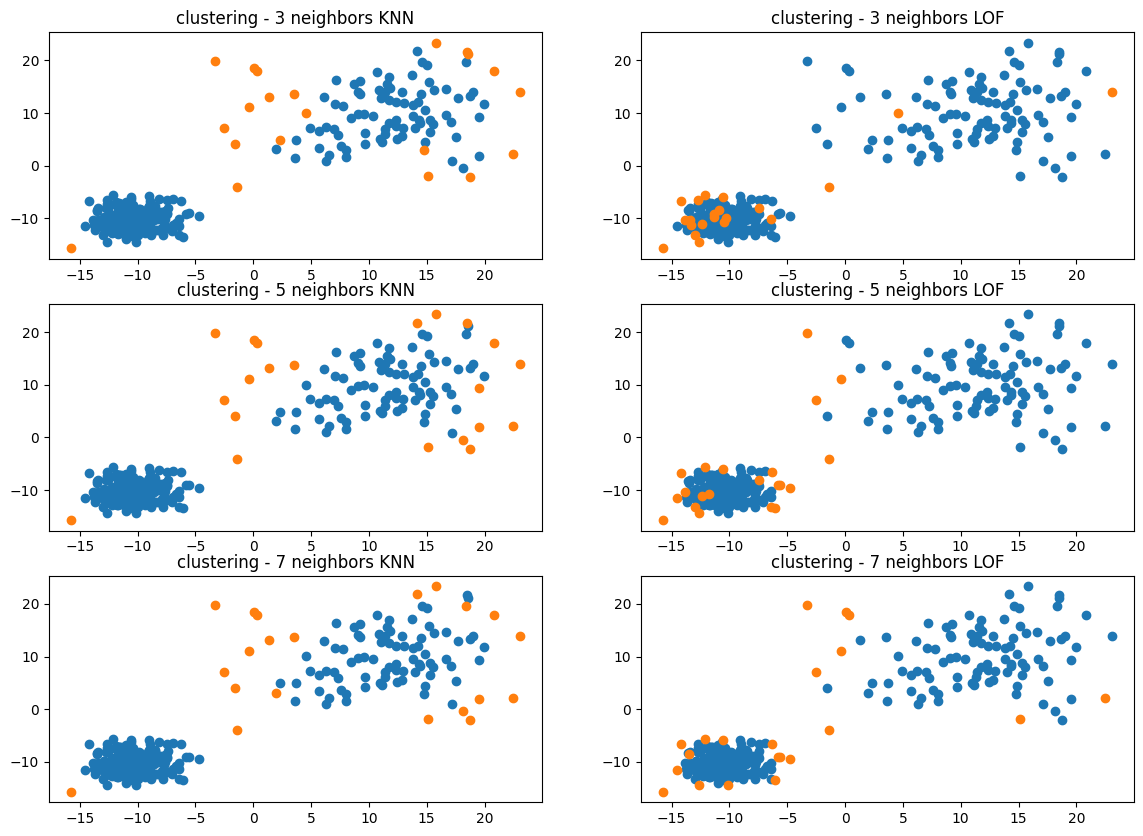

In [ ]:
# Exercise 3

X, y = make_blobs(n_samples=[200, 100], centers=[(-10, -10), (10, 10)], cluster_std=[2, 6])

figure, axis = plt.subplots(3, 2, figsize=(14, 10))

for i, n_neigh in enumerate([3, 5, 7]):
  model1 = KNN(n_neighbors=n_neigh, contamination=0.07)
  model2 = LOF(n_neighbors=n_neigh, contamination=0.07)

  for j, clf in enumerate([model1, model2]):
    clf.fit(X)
    train_pred = clf.labels_

    outlier_mask_train = train_pred == 1

    axis[i][j].scatter(X[~outlier_mask_train,:1], X[~outlier_mask_train,1:])
    axis[i][j].scatter(X[outlier_mask_train,:1], X[outlier_mask_train,1:])

    if j == 0:
      model_name = 'KNN'
    else:
      model_name = 'LOF'

    axis[i][j].set_title('clustering - ' + str(n_neigh) + ' neighbors ' + model_name)

plt.show()